<a href="https://colab.research.google.com/github/HankTheTank108/MiniProject331/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This box is used to upload my csv file into google colab
#The file was obtained by taking all the data from pokemon data base, converting it into an excel file, and then turning that .xlsx file into a .csv file
#Upload the csv file saved in the github repository titled "Pokemon_Stats(Real)" when prompted


from google.colab import files
import pandas as pd

# Upload the .csv file
uploaded = files.upload()

# Get the filename of the uploaded file
file_name = list(uploaded.keys())[0]

# Load the .csv file into a DataFrame
df = pd.read_csv('Pokemon_Stats(Real).csv')

# Now you can work with the DataFrame 'df'
# Read the CSV file into a DataFrame with the first row as header
pokemon_data = pd.read_csv("Pokemon_Stats(Real).csv", header=0)

Saving Pokemon_Stats(Real).csv to Pokemon_Stats(Real).csv


In [2]:
#This box adds 4 new columns and creates a new csv file to read from. This is to split a pokemons type from under the type column into 2 seperate columns to account for dual typing.
#Then it will create 2 new columns that will list a pokemons given weaknesses and resistances based on its unique typing, accounting for dual typing.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
pokemon_data = pd.read_csv("Pokemon_Stats(Real).csv")

# Split the 'Type' column into two separate columns 'Type 1' and 'Type 2'
pokemon_data[['Type 1', 'Type 2']] = pokemon_data['Type'].str.split(' ', n=1, expand=True)


# Save the modified DataFrame to a new CSV file
pokemon_data.to_csv("Pokemon_Stats_with_dual_typing.csv", index=False)


import pandas as pd

# Function to determine weaknesses for a given Pokémon type
def weaknesses(pokemon_types):
    weaknesses_dict = {
        'Normal': ['Fighting'],
        'Fire': ['Water', 'Rock', 'Ground'],
        'Water': ['Electric', 'Grass'],
        'Electric': ['Ground'],
        'Grass': ['Fire', 'Ice', 'Poison', 'Flying', 'Bug'],
        'Ice': ['Fire', 'Fighting', 'Rock', 'Steel'],
        'Fighting': ['Flying', 'Psychic', 'Fairy'],
        'Poison': ['Ground', 'Psychic'],
        'Ground': ['Water', 'Grass', 'Ice'],
        'Flying': ['Electric', 'Ice', 'Rock'],
        'Psychic': ['Bug', 'Ghost', 'Dark'],
        'Bug': ['Fire', 'Flying', 'Rock'],
        'Rock': ['Water', 'Grass', 'Fighting', 'Ground', 'Steel'],
        'Ghost': ['Ghost', 'Dark'],
        'Dragon': ['Ice', 'Dragon', 'Fairy'],
        'Dark': ['Fighting', 'Bug', 'Fairy'],
        'Steel': ['Fire', 'Fighting', 'Ground'],
        'Fairy': ['Poison', 'Steel'],
    }

    # Initialize a list to store weaknesses for each type
    all_weaknesses = []

    # Loop through each type
    for type in pokemon_types:
        # Retrieve weaknesses for the current type and add them to the list
        weaknesses_for_type = weaknesses_dict.get(type, [])
        all_weaknesses.extend(weaknesses_for_type)

    # Remove duplicates from the list of weaknesses
    all_weaknesses = list(set(all_weaknesses))

    return ', '.join(all_weaknesses)

# Function to determine resistances for a given Pokémon type
def resistances(pokemon_types):
    resistances_dict = {
        'Normal': [],
        'Fire': ['Fire', 'Grass', 'Ice', 'Bug', 'Steel', 'Fairy'],
        'Water': ['Fire', 'Water', 'Ice', 'Steel'],
        'Electric': ['Electric', 'Flying', 'Steel'],
        'Grass': ['Water', 'Electric', 'Grass', 'Ground'],
        'Ice': ['Ice'],
        'Fighting': ['Bug', 'Rock', 'Dark'],
        'Poison': ['Grass', 'Fighting', 'Poison', 'Bug', 'Fairy'],
        'Ground': ['Poison', 'Rock'],
        'Flying': ['Grass', 'Fighting', 'Bug'],
        'Psychic': ['Fighting', 'Psychic'],
        'Bug': ['Grass', 'Fighting', 'Ground'],
        'Rock': ['Normal', 'Fire', 'Poison', 'Flying'],
        'Ghost': ['Poison', 'Bug'],
        'Dragon': ['Fire', 'Water', 'Electric', 'Grass'],
        'Dark': ['Ghost', 'Dark'],
        'Steel': ['Normal', 'Grass', 'Ice', 'Flying', 'Psychic', 'Bug', 'Rock', 'Dragon', 'Steel', 'Fairy'],
        'Fairy': ['Fighting', 'Bug', 'Dark'],
    }

    # Initialize a list to store resistances for each type
    all_resistances = []

    # Loop through each type
    for type in pokemon_types:
        # Retrieve resistances for the current type and add them to the list
        resistances_for_type = resistances_dict.get(type, [])
        all_resistances.extend(resistances_for_type)

    # Remove duplicates from the list of resistances
    all_resistances = list(set(all_resistances))

    return ', '.join(all_resistances)

# Read the CSV file into a DataFrame
pokemon_data = pd.read_csv("Pokemon_Stats_with_dual_typing.csv")

# Add a new column 'Weaknesses' to the DataFrame
pokemon_data['Weaknesses'] = pokemon_data[['Type 1', 'Type 2']].apply(lambda x: weaknesses(x), axis=1)

# Add a new column 'Resistances' to the DataFrame
pokemon_data['Resistances'] = pokemon_data[['Type 1', 'Type 2']].apply(lambda x: resistances(x), axis=1)

# Save the modified DataFrame to the same CSV file
pokemon_data.to_csv("Pokemon_Stats_with_dual_typing.csv", index=False)


# Display the DataFrame in a clean way
poke_df = pd.read_csv("Pokemon_Stats_with_dual_typing.csv")
poke_df.sort_values(['Name'])
columns = list(poke_df.columns)
columns.remove('Name')
columns = ['Name'] + columns
poke_df = poke_df[columns]
sns.set_theme(style="whitegrid")
poke_df

,Name,#,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1,Type 2,Weaknesses,Resistances
0,Bulbasaur,1,Grass Poison,318,45,49,49,65,65,45,1,Grass,Poison,"Poison, Bug, Fire, Flying, Ground, Ice, Psychic","Poison, Bug, Grass, Water, Fairy, Ground, Elec..."
1,Ivysaur,2,Grass Poison,405,60,62,63,80,80,60,1,Grass,Poison,"Poison, Bug, Fire, Flying, Ground, Ice, Psychic","Poison, Bug, Grass, Water, Fairy, Ground, Elec..."
2,Venusaur,3,Grass Poison,525,80,82,83,100,100,80,1,Grass,Poison,"Poison, Bug, Fire, Flying, Ground, Ice, Psychic","Poison, Bug, Grass, Water, Fairy, Ground, Elec..."
3,Venusaur Mega Venusaur,3,Grass Poison,625,80,100,123,122,120,80,1,Grass,Poison,"Poison, Bug, Fire, Flying, Ground, Ice, Psychic","Poison, Bug, Grass, Water, Fairy, Ground, Elec..."
4,Charmander,4,Fire,309,39,52,43,60,50,65,1,Fire,NaN,"Water, Ground, Rock","Bug, Fire, Grass, Fairy, Steel, Ice"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,Iron Crown,1023,Steel Psychic,590,90,72,100,122,108,98,9,Steel,Psychic,"Bug, Fire, Ghost, Ground, Dark, Fighting","Bug, Dragon, Grass, Flying, Fairy, Rock, Fight..."
1211,Terapagos Normal Form,1024,Normal,450,90,65,85,65,85,60,9,Normal,NaN,Fighting,NaN
1212,Terapagos Terastal Form,1024,Normal,600,95,95,110,105,110,85,9,Normal,NaN,Fighting,NaN
1213,Terapagos Stellar Form,1024,Normal,700,160,105,110,130,110,85,9,Normal,NaN,Fighting,NaN


<ipython-input-3-b3b68d7103a0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generation', y='count', data=poke_count_per_gen, palette='muted')


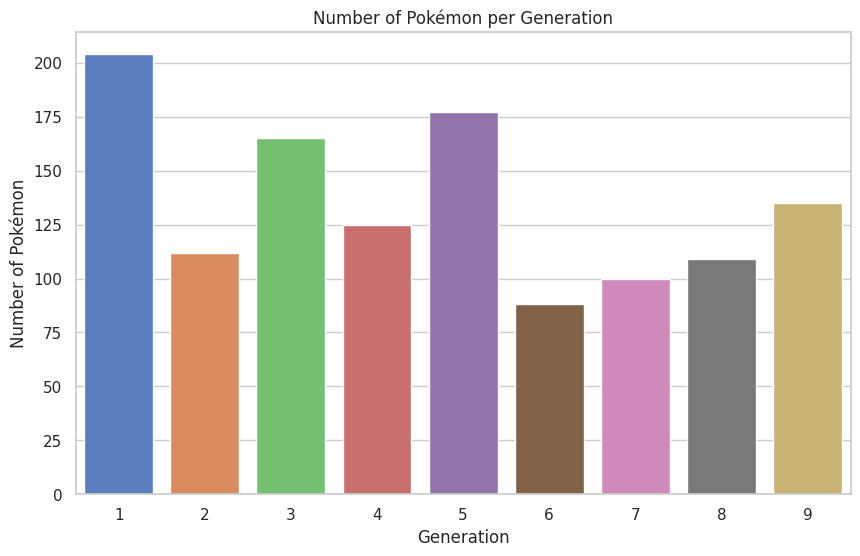

In [3]:
#This box displays the numebr of pokemon per generation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Counting Pokémon per Generation
poke_count_per_gen = pokemon_data['Generation'].value_counts().sort_index().reset_index()
poke_count_per_gen.columns = ['Generation', 'count']

# Plotting out all the new pokemon in each generation

plt.figure(figsize=(10, 6))
sns.barplot(x='Generation', y='count', data=poke_count_per_gen, palette='muted')
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.title('Number of Pokémon per Generation')
plt.show()

Enter the generation number (1-9) or 'All' to see all generations: All


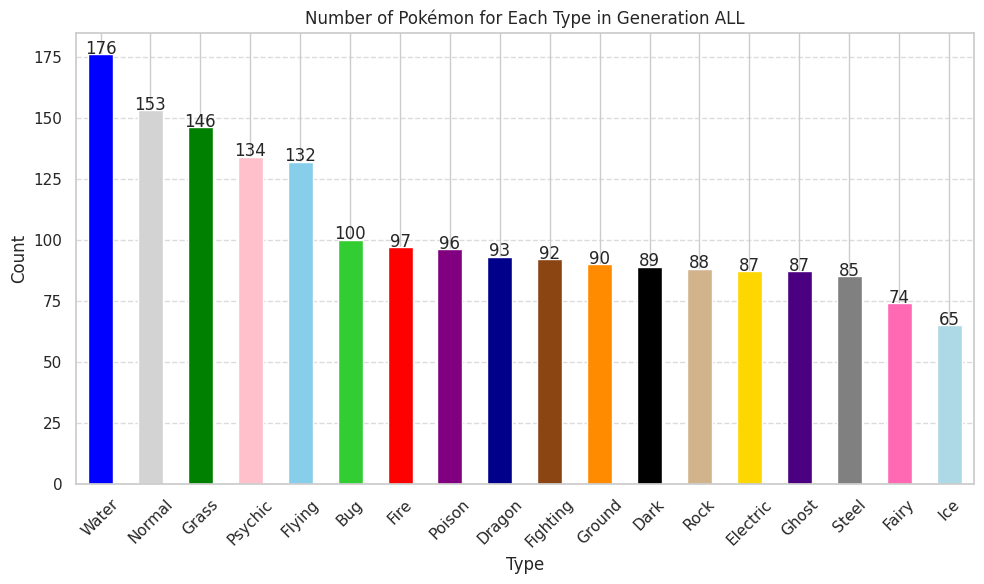

In [ ]:
#This box will display the number of pokemon of each type added in a generation of your choosing

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
pokemon_data = pd.read_csv("Pokemon_Stats_with_dual_typing.csv")

# Prompt the user to input the desired generation
generation_input = input("Enter the generation number (1-9) or 'All' to see all generations: ")

# Filter the DataFrame based on the user's input
if generation_input.lower() == 'all':
    filtered_data = pokemon_data
else:
    try:
        generation_number = int(generation_input)
        filtered_data = pokemon_data[pokemon_data['Generation'] == generation_number]
    except ValueError:
        print("Invalid input. Please enter a generation number (1-9) or 'All'.")
        exit()

# Calculate the count of Pokémon for each type
type_counts = pd.concat([filtered_data['Type 1'], filtered_data['Type 2']]).value_counts()

# Define a color map for Pokémon types
type_colors = {
    'Normal': 'lightgray',
    'Fire': 'red',
    'Water': 'blue',
    'Electric': 'gold',
    'Grass': 'green',
    'Ice': 'lightblue',
    'Fighting': 'saddlebrown',
    'Poison': 'purple',
    'Ground': 'darkorange',
    'Flying': 'skyblue',
    'Psychic': 'pink',
    'Bug': 'limegreen',
    'Rock': 'tan',
    'Ghost': 'indigo',
    'Dragon': 'darkblue',
    'Dark': 'black',
    'Steel': 'gray',
    'Fairy': 'hotpink',
}

# Plot the bar graph with corresponding colors
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color=[type_colors[type] for type in type_counts.index])
plt.title(f'Number of Pokémon for Each Type in Generation {generation_input.upper()}')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of each bar
for i, count in enumerate(type_counts):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.tight_layout()

# Show the plot
plt.show()


Enter the Pokémon generation you want to analyze (or type 'All' for all generations): All
Enter the Pokémon type you want to analyze: Dragon


<ipython-input-59-8450068d6112>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type 1'].fillna('', inplace=True)
<ipython-input-59-8450068d6112>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type 2'].fillna('', inplace=True)


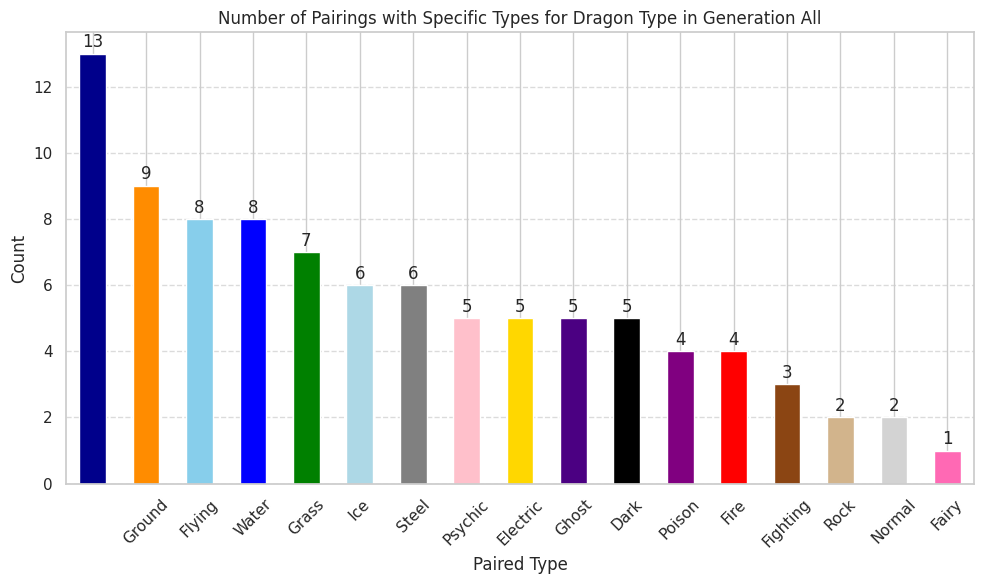

In [ ]:
#This box will show how frequently a type is paired with another type, either in general or in a specific generation


import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
pokemon_data = pd.read_csv("Pokemon_Stats_with_dual_typing.csv")

# Prompt the user to input the desired generation
generation_input = input("Enter the Pokémon generation you want to analyze (or type 'All' for all generations): ")

# Prompt the user to input the desired type
type_input = input("Enter the Pokémon type you want to analyze: ")

# Filter the DataFrame based on the user's input
if generation_input.lower() == 'all':
    filtered_data = pokemon_data
else:
    try:
        generation_input = int(generation_input)
        filtered_data = pokemon_data[pokemon_data['Generation'] == generation_input]
    except ValueError:
        print("Invalid input for generation. Please enter a valid generation number or 'All'.")
        exit()

# Filter the DataFrame based on the user's input
filtered_data = filtered_data[(filtered_data['Type 1'] == type_input) | (filtered_data['Type 2'] == type_input)]

# Replace NaN values with empty strings
filtered_data['Type 1'].fillna('', inplace=True)
filtered_data['Type 2'].fillna('', inplace=True)

# Calculate the frequency of each paired type
paired_types = filtered_data.apply(lambda row: row['Type 2']
                                    if row['Type 1'] == type_input
                                    else row['Type 1']
                                    if row['Type 2'] == type_input
                                    else 'MonoType' if pd.isnull(row['Type 2'])
                                    else None, axis=1).value_counts().dropna()

# Set the index name to "MonoType" if it does not exist
paired_types.index.name = 'MonoType'

# Define a color map for Pokémon types
type_colors = {
    'Normal': 'lightgray',
    'Fire': 'red',
    'Water': 'blue',
    'Electric': 'gold',
    'Grass': 'green',
    'Ice': 'lightblue',
    'Fighting': 'saddlebrown',
    'Poison': 'purple',
    'Ground': 'darkorange',
    'Flying': 'skyblue',
    'Psychic': 'pink',
    'Bug': 'limegreen',
    'Rock': 'tan',
    'Ghost': 'indigo',
    'Dragon': 'darkblue',
    'Dark': 'black',
    'Steel': 'gray',
    'Fairy': 'hotpink',
}

# Plot the bar graph for paired occurrences with specific other types
plt.figure(figsize=(10, 6))
paired_types.plot(kind='bar', color=[type_colors.get(typing, type_colors[type_input]) for typing in paired_types.index])
plt.title(f'Number of Pairings with Specific Types for {type_input} Type in Generation {generation_input}')
plt.xlabel('Paired Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels above each bar
for i, count in enumerate(paired_types):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.tight_layout()

# Show the plot
plt.show()


Enter the Pokémon stat you want to analyze (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Total, or All): All


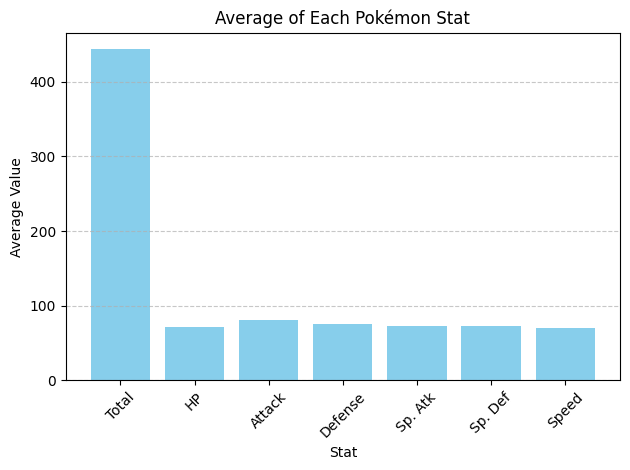

KeyError: 'All'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
pokemon_data = pd.read_csv("Pokemon_Stats_with_dual_typing.csv")

# Define the mapping of stats to column names
stat_columns = {
    'Total': 'Total',
    'HP': 'HP',
    'Attack': 'Attack',
    'Defense': 'Defense',
    'Sp. Atk': 'Sp. Atk',
    'Sp. Def': 'Sp. Def',
    'Speed': 'Speed'
}

# Prompt the user to input the stat they want to analyze
stat_input = input("Enter the Pokémon stat you want to analyze (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Total, or All): ").capitalize()

# Check if the input stat is valid
if stat_input not in stat_columns and stat_input != 'All':
    print("Invalid input. Please enter a valid Pokémon stat or 'All'.")
    exit()

# Calculate the average of each stat for all Pokémon
if stat_input == 'All':
    stat_averages = {stat: pokemon_data[column].mean() for stat, column in stat_columns.items()}
    plt.bar(stat_averages.keys(), stat_averages.values(), color='skyblue')
    plt.title('Average of Each Pokémon Stat')
    plt.xlabel('Stat')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    exit()

# Calculate the average of the selected stat for each Pokémon
pokemon_data['Average'] = pokemon_data[stat_columns[stat_input]]

# Plot the bar graph for average total of each Pokémon stat
plt.figure(figsize=(10, 6))
plt.bar(pokemon_data.index, pokemon_data['Average'], color='skyblue')
plt.title(f'Average {stat_input} of Each Pokémon')
plt.xlabel('Pokémon')
plt.ylabel(f'Average {stat_input}')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Show the plot
plt.show()


In [4]:
#This box will show you the average stat for any stat you want within any generation and for any given type

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
pokemon_data = pd.read_csv("Pokemon_Stats_with_dual_typing.csv")

# Prompt the user to input the generation they want to analyze
generation_input = input("Enter the Pokémon generation you want to analyze (1-9 or All): ")

# Check if the input generation is valid
valid_generations = [str(i) for i in range(1, 10)] + ['All']
if generation_input not in valid_generations:
    print("Invalid input. Please enter a valid Pokémon generation (1-9 or All).")
    exit()

# Prompt the user to input the stat they want to analyze
stat_input = input("Enter the Pokémon stat you want to analyze (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Total, or All): ").capitalize()

# Check if the input stat is valid
valid_stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'All']
if stat_input not in valid_stats:
    print("Invalid input. Please enter a valid Pokémon stat or 'All'.")
    exit()

# Prompt the user to input the type they want to analyze
type_input = input("Enter the Pokémon type you want to analyze (e.g., Normal, Fire, Water, etc.), or 'All' for all types: ").capitalize()

# Check if the input type is valid
valid_types = list(set(pokemon_data['Type 1']).union(set(pokemon_data['Type 2']))) + ['All']
if type_input not in valid_types:
    print("Invalid input. Please enter a valid Pokémon type or 'All'.")
    exit()

# Filter the data based on the selected generation
if generation_input != 'All':
    pokemon_data = pokemon_data[pokemon_data['Generation'] == int(generation_input)]

# Filter the data based on the selected type
if type_input != 'All':
    pokemon_data = pokemon_data[(pokemon_data['Type 1'] == type_input) | (pokemon_data['Type 2'] == type_input)]

# Calculate and display the average of the selected stat for all Pokémon in the selected generation and type
if stat_input == 'All':
    for stat in valid_stats[:-1]:  # Exclude 'All'
        avg_stat = pokemon_data[stat].mean()
        print(f"The average {stat} stat for {type_input} Pokémon in generation {generation_input} is: {avg_stat}")
else:
    avg_stat = pokemon_data[stat_input].mean()
    print(f"The average {stat_input} stat for {type_input} Pokémon in generation {generation_input} is: {avg_stat}")


Enter the Pokémon generation you want to analyze (1-9 or All): 5
Enter the Pokémon stat you want to analyze (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Total, or All): All
Enter the Pokémon type you want to analyze (e.g., Normal, Fire, Water, etc.), or 'All' for all types: All
The average HP stat for All Pokémon in generation 5 is: 72.27118644067797
The average Attack stat for All Pokémon in generation 5 is: 83.25988700564972
The average Defense stat for All Pokémon in generation 5 is: 72.0225988700565
The average Sp. Atk stat for All Pokémon in generation 5 is: 71.64406779661017
The average Sp. Def stat for All Pokémon in generation 5 is: 68.16949152542372
The average Speed stat for All Pokémon in generation 5 is: 68.96045197740114
The average Total stat for All Pokémon in generation 5 is: 436.3276836158192


In [5]:
#This box will show you all the stats, weaknesses, and resistances for a given pokemon

import pandas as pd

# Read the CSV file into a DataFrame
pokemon_data = pd.read_csv("Pokemon_Stats_with_dual_typing.csv")

# Prompt the user to input the Pokémon name
pokemon_name = input("Enter the name of the Pokémon you want to look up: ")

# Check if the Pokémon name is valid
if pokemon_name not in pokemon_data['Name'].values:
    print("Invalid Pokémon name. Please enter a valid Pokémon name.")
else:
    # Get the data of the specified Pokémon
    pokemon = pokemon_data[pokemon_data['Name'] == pokemon_name].iloc[0]

    # Print the stats of the specified Pokémon
    print(f"\nStats for {pokemon_name}:")
    print(f"Total: {pokemon['Total']}")
    print(f"HP: {pokemon['HP']}")
    print(f"Attack: {pokemon['Attack']}")
    print(f"Defense: {pokemon['Defense']}")
    print(f"Sp. Atk: {pokemon['Sp. Atk']}")
    print(f"Sp. Def: {pokemon['Sp. Def']}")
    print(f"Speed: {pokemon['Speed']}")

    # Display weaknesses and resistances
    print("\nWeaknesses:")
    print(pokemon['Weaknesses'])
    print("\nResistances:")
    print(pokemon['Resistances'])


Enter the name of the Pokémon you want to look up: Flutter Mane

Stats for Flutter Mane:
Total: 570
HP: 55
Attack: 55
Defense: 55
Sp. Atk: 135
Sp. Def: 135
Speed: 135

Weaknesses:
Poison, Dark, Ghost, Steel

Resistances:
Poison, Fighting, Dark, Bug
